In [1]:
#                        """"""""""""""PROJECT ON STOCK PREDICTION""""""""""""""""""""""""""

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
#from __future__ import division
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [2]:
 AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,189.509802,185.730198,187.601621,187.625495,3.337265e+07,185.880940
std,22.187530,21.946855,22.082118,22.085381,1.409400e+07,21.938495
min,145.720001,142.000000,143.979996,142.190002,9.910093e+06,141.582779
25%,173.100006,169.850006,171.509995,171.070007,2.344250e+07,170.178680
50%,187.300003,184.750000,186.119995,185.860001,3.112420e+07,184.030731
75%,209.250000,205.479996,207.279999,207.529999,3.953150e+07,205.875610
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [3]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-02-14 to 2019-02-15
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


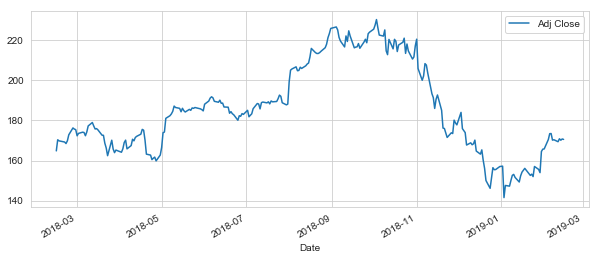

In [4]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

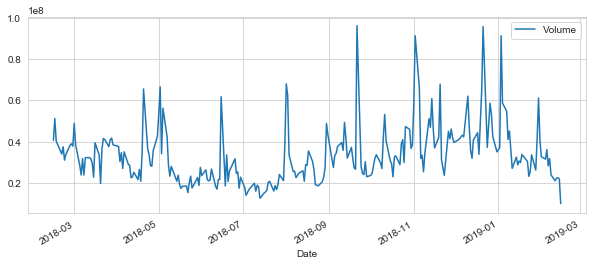

In [5]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

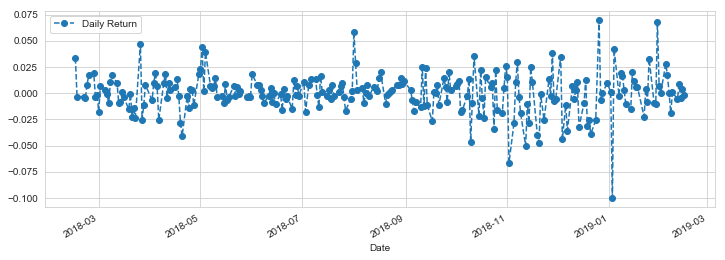

In [6]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [7]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
# Let's take a quick look
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-14,164.859650,1451.050049,1069.699951,89.684029
2018-02-15,170.395370,1461.760010,1089.520020,91.511101
2018-02-16,169.843765,1448.689941,1094.800049,90.859276
2018-02-20,169.272461,1468.349976,1102.459961,91.570351
2018-02-21,168.504166,1482.920044,1111.339966,90.355598


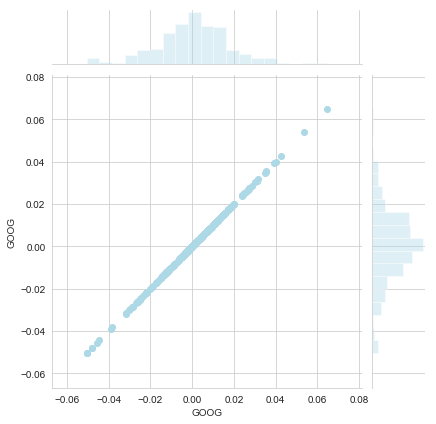

In [10]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='lightblue')

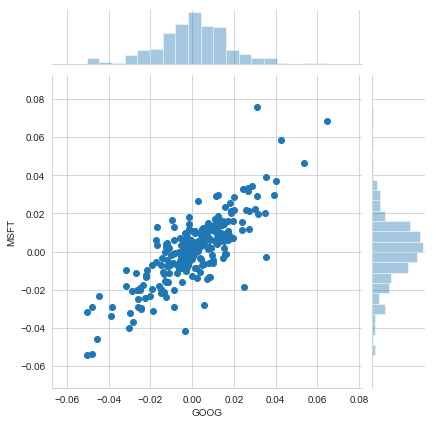

In [9]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')